## RainFall Prediction Pre-Processing. 

In [47]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [48]:
RainPred = pd.read_csv('C:/Users/sabhn/OneDrive/Desktop/KBS/Weather Prediction/weatherAUS.csv')

In [49]:
RainPred.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [50]:
RainPred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
Date             145460 non-null object
Location         145460 non-null object
MinTemp          143975 non-null float64
MaxTemp          144199 non-null float64
Rainfall         142199 non-null float64
Evaporation      82670 non-null float64
Sunshine         75625 non-null float64
WindGustDir      135134 non-null object
WindGustSpeed    135197 non-null float64
WindDir9am       134894 non-null object
WindDir3pm       141232 non-null object
WindSpeed9am     143693 non-null float64
WindSpeed3pm     142398 non-null float64
Humidity9am      142806 non-null float64
Humidity3pm      140953 non-null float64
Pressure9am      130395 non-null float64
Pressure3pm      130432 non-null float64
Cloud9am         89572 non-null float64
Cloud3pm         86102 non-null float64
Temp9am          143693 non-null float64
Temp3pm          141851 non-null float64
RainToday        142199 non-null obje

## Removing Null Values.

In [51]:
RainPred.apply(lambda column: sum(column.isnull()))

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RISK_MM           3267
RainTomorrow      3267
dtype: int64

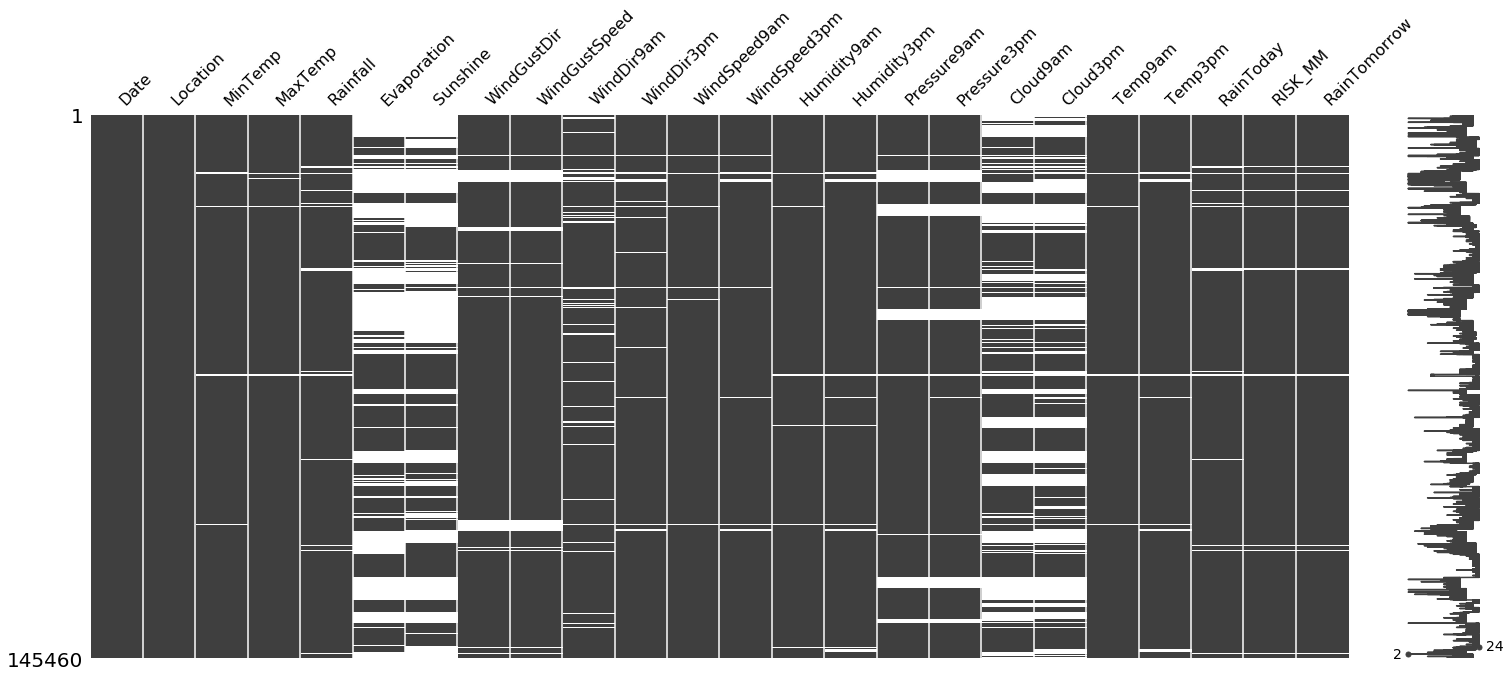

In [52]:
import missingno as msno
msno.matrix(RainPred)

In [53]:
RainPred = RainPred.dropna()

In [54]:
RainPred.apply(lambda column: sum(column.isnull()))

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

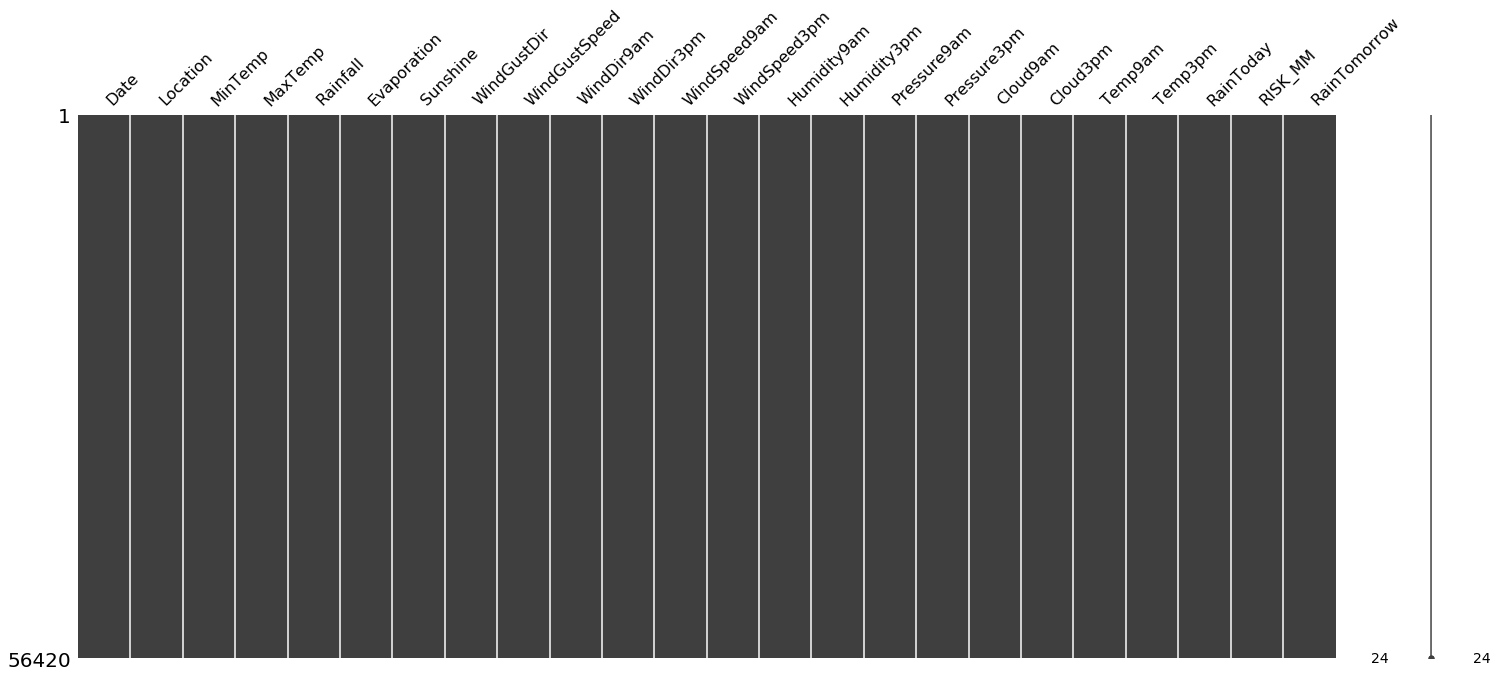

In [55]:
import missingno as msno
msno.matrix(RainPred)

## Adding Year, Month, and Day Columns.

In [56]:
RainPred['Date'] = pd.to_datetime(RainPred['Date'])

In [57]:
RainPred['Year'] = RainPred['Date'].dt.year

In [58]:
RainPred['Month'] = RainPred['Date'].dt.month

In [59]:
RainPred['Day'] = RainPred['Date'].dt.day

In [60]:
RainPred.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,2.0,5.0,26.6,33.4,No,0.0,No,2009,1,1
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,1.0,1.0,20.3,27.0,No,0.0,No,2009,1,2
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,1.0,6.0,28.7,34.9,No,0.0,No,2009,1,4
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,1.0,5.0,29.1,35.6,No,0.0,No,2009,1,5
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,1.0,6.0,33.6,37.6,No,0.0,No,2009,1,6


In [61]:
RainPred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 27 columns):
Date             56420 non-null datetime64[ns]
Location         56420 non-null object
MinTemp          56420 non-null float64
MaxTemp          56420 non-null float64
Rainfall         56420 non-null float64
Evaporation      56420 non-null float64
Sunshine         56420 non-null float64
WindGustDir      56420 non-null object
WindGustSpeed    56420 non-null float64
WindDir9am       56420 non-null object
WindDir3pm       56420 non-null object
WindSpeed9am     56420 non-null float64
WindSpeed3pm     56420 non-null float64
Humidity9am      56420 non-null float64
Humidity3pm      56420 non-null float64
Pressure9am      56420 non-null float64
Pressure3pm      56420 non-null float64
Cloud9am         56420 non-null float64
Cloud3pm         56420 non-null float64
Temp9am          56420 non-null float64
Temp3pm          56420 non-null float64
RainToday        56420 non-null object
RISK_

In [62]:
RainPred.to_csv('cleanfile1.csv' )